In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read csvfile, and make a dataframe
titanic_dataset = pd.read_csv('titanic_data.csv')
titanic_data = DataFrame(titanic_dataset)

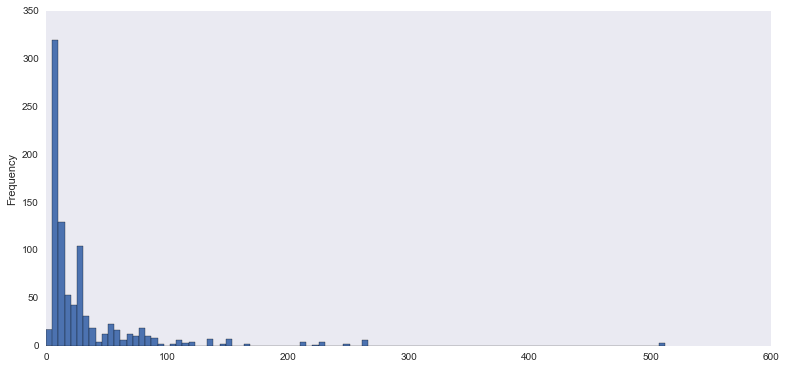

In [3]:
# Above all, let's see the how much fare passengers on titanic paid mostly.
# Histogram of the passengers' Fare on titanic 
titanic_data['Fare'].plot.hist(by='Fare',bins=100,figsize=(13,6),grid=False)

### The distribution of fare passengers paying is positively skewed. Most of them just paid a fare of 10 or 20.
### In the following part, I will reorganize the frame to make investigation about the effects of different factors especially fare on their survivablity, for example, were people who paid more  able to survive more easily?

In [4]:
# because I won't analyze the columns of 'PassengerId', Cabin', 'Ticket', 'Name' and 'Embarked',
# so I drop them to make a somehow clean frame
titanic_data.drop('PassengerId',axis=1,inplace=True)
titanic_data.drop('Cabin',axis=1,inplace=True)
titanic_data.drop('Ticket',axis=1,inplace=True)
titanic_data.drop('Name',axis=1,inplace=True)
titanic_data.drop('Embarked',axis=1,inplace=True)

In [5]:
# First of all, I will calculate the survival rates of both male and female

sex_survival = titanic_data.groupby('Sex')
Sex = ['female','male']
for sex in Sex:
    sex_survival_num = sex_survival.get_group(sex)['Survived'].sum()
    sex_num = titanic_data[titanic_data['Sex']==sex]['Sex'].count()
    sex_survival_rate = float(sex_survival_num)/sex_num
    print '%s has %.2f chance to survive' % (sex, sex_survival_rate)
    
# next I will calculate the rates of male adults and female adults, let me put children afterwards.
    
# set column 'Age' into 0(child) and 1(adult), named 'Adult'
Adult = np.where(titanic_data['Age'].values>18.0,1,0)
titanic_data['Adult'] = DataFrame(Adult)

sex_age_survival = titanic_data.groupby(['Sex','Adult'])
for sex in Sex:
    adult_sex_num = sex_survival.get_group(sex)['Adult'].sum()
    adult_sex_survival_num = sex_age_survival.get_group((sex,1))['Survived'].sum()
    adult_sex_survival_rate = float(adult_sex_survival_num)/adult_sex_num
    print '%s adult has %.2f chance to survive' % (sex, adult_sex_survival_rate)

female has 0.74 chance to survive
male has 0.19 chance to survive
female adult has 0.78 chance to survive
male adult has 0.18 chance to survive


### The result seems a little surprising, it shows that male in general has so much lower chnace than female.
### However, it is understandable, as the convention of 'Lady First', since this is a reasonable result, I become curious about other factors, like the class level people took, the number of family members, even the fare they have paid.
### These factors must have had influence on their attempt to get survived.

In [6]:
#set column 'Sex' into 0(female) and 1(male)
Sex = np.where(titanic_data['Sex']=='male',1,0)
titanic_data['Sex'] = DataFrame(Sex)

# add two columns nameed 'Female' and 'Male' to calculate effects of different sexes on survival
titanic_data['Male'] = titanic_data['Sex']
titanic_data['Female'] = DataFrame(1 - titanic_data['Male'])

#create a column 'Family' which adds up SibSp and Parch, to represent the family size of a person
titanic_data['Family'] = titanic_data['SibSp'].values + titanic_data['Parch'].values

### Now, let me take account for the children in additional to adults.
### In order to calculate the survival rate of different groups, which are adult-male, child-male, adult-female and child-female,
### I create four columns 'MA', 'MC,'FA', and 'FC' represent them respectively, and beyond that, I will include another four columns 'MAS', 'MCS', 'FAS' and 'FCS' represent the number of survived in each group respectively.

In [7]:
def SA(sex_age,sex,age):
    if age == 'Adult':
        sex_age = titanic_data[(titanic_data[sex] == 1) & (titanic_data['Adult'] == 1)]
    else:
        sex_age = titanic_data[(titanic_data[sex] == 1) & (titanic_data['Adult'] == 0)]
    sex_age[sex[0]+age[0]] = 1
    titanic_data[sex[0]+age[0]] = DataFrame(sex_age[sex[0]+age[0]])
    return titanic_data.fillna({sex[0]+age[0]:0},inplace=True).head()
SA('male_adult','Male','Adult')
SA('male_child','Male','Child')
SA('female_adult','Female','Adult')
SA('female_child','Female','Child')

C:\Users\Joey\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Adult,Male,Female,Family,MA,MC,FA,FC
0,0,3,1,22.0,1,0,7.2500,1,1,0,1,1.0,0.0,0.0,0.0
1,1,1,0,38.0,1,0,71.2833,1,0,1,1,0.0,0.0,1.0,0.0
2,1,3,0,26.0,0,0,7.9250,1,0,1,0,0.0,0.0,1.0,0.0
3,1,1,0,35.0,1,0,53.1000,1,0,1,1,0.0,0.0,1.0,0.0
4,0,3,1,35.0,0,0,8.0500,1,1,0,0,1.0,0.0,0.0,0.0


In [8]:
def SAS(sex_age_survival,sex,age):
    if age == 'Adult':
        sex_age_survival = titanic_data[(titanic_data[sex] == 1) & (titanic_data['Adult'] == 1) & (titanic_data['Survived'] == 1)]
    else:
        sex_age_survival = titanic_data[(titanic_data[sex] == 1) & (titanic_data['Adult'] == 0) & (titanic_data['Survived'] == 1)]
    sex_age_survival[sex[0]+age[0]+'S'] = 1
    titanic_data[sex[0]+age[0]+'S'] = DataFrame(sex_age_survival[sex[0]+age[0]+'S'])
    return titanic_data.fillna({sex[0]+age[0]+'S':0},inplace=True).head()
SAS('male_adult_survival','Male','Adult')
SAS('male_child_survival','Male','Child')
SAS('female_adult_survival','Female','Adult')
SAS('female_child_survival','Female','Child')

C:\Users\Joey\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Adult,Male,Female,Family,MA,MC,FA,FC,MAS,MCS,FAS,FCS
0,0,3,1,22.0,1,0,7.2500,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,38.0,1,0,71.2833,1,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,0,26.0,0,0,7.9250,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,35.0,1,0,53.1000,1,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,1,35.0,0,0,8.0500,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# drop any row with a NaN value
titanic_data_dpna = titanic_data.dropna(how='any')

In [10]:
#calculate the outliers of 'Fare' and 'Family' columns
fare_oli_right = titanic_data_dpna['Fare'].mean() + 1.5 * titanic_data_dpna['Fare'].std()
fare_oli_left =titanic_data_dpna['Fare'].mean() - 1.5 * titanic_data_dpna['Fare'].std()
family_oli_right = titanic_data_dpna['Family'].mean() + 1.5 * titanic_data_dpna['Family'].std()
family_oli_left = titanic_data_dpna['Family'].mean() - 1.5 * titanic_data_dpna['Family'].std()
print fare_oli_right,fare_oli_left,family_oli_right,family_oli_left

114.072908259 -44.6838802482 3.16965900589 -1.28170382382


In [11]:
# remove outliers from two columns

# remove fare-outlier first
titan_non_foutlier = titanic_data_dpna[titanic_data_dpna['Fare'].values < fare_oli_right]
# then famlily-outlier
titan_non_outlier = titan_non_foutlier[titan_non_foutlier['Family'].values < family_oli_right]

In [12]:
# set column 'Fare' into 'less than 10', 'between 10 and 20', 'between 20 and 30', and 'bigger than 30', 
# so that I can make the four categories
func = lambda x : 'less than 10' if (x < 10) else 'between 10 and 20' if (x > 10 and x < 20)\
else 'between 20 and 30' if (x > 20 and x < 30) else 'bigger than 30'

titan_non_outlier['Fare'] = DataFrame(titanic_data['Fare'].map(func))

C:\Users\Joey\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
# drop columns of 'Sex','Age','SibSp','Parch','Adult','Male' and 'Female' since they will not be used
titan_non_outlier.drop(['Sex','Age','SibSp','Parch','Adult','Male','Female'],axis=1,inplace=True)

C:\Users\Joey\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
# grouped by Fare, let's check how the Fare affect people to survive
fare_survival =titan_non_outlier.groupby('Fare')
fare_survival.sum()

,Survived,Pclass,Family,MA,MC,FA,FC,MAS,MCS,FAS,FCS
Fare,,,,,,,,,,,
between 10 and 20,65,369,98,72.0,14.0,46.0,22.0,7.0,8.0,35.0,15.0
between 20 and 30,50,185,104,50.0,8.0,33.0,8.0,11.0,5.0,27.0,7.0
bigger than 30,93,175,137,73.0,7.0,53.0,10.0,25.0,5.0,53.0,10.0
less than 10,46,697,28,175.0,20.0,29.0,11.0,22.0,3.0,13.0,8.0


In [15]:
# calculate the survival rate of each group, named 'MASR_0', 'MCSR_0', 'FASR_0', 'FCSR_0' respectively
fare_survival_rate = fare_survival.sum()[['MA','MC','FA','FC','MAS','MCS','FAS','FCS']]
fare_survival_rate['MASR_0'] = DataFrame(fare_survival_rate['MAS'] / fare_survival_rate['MA'])
fare_survival_rate['MCSR_0'] = DataFrame(fare_survival_rate['MCS'] / fare_survival_rate['MC'])
fare_survival_rate['FASR_0'] = DataFrame(fare_survival_rate['FAS'] / fare_survival_rate['FA'])
fare_survival_rate['FCSR_0'] = DataFrame(fare_survival_rate['FCS'] / fare_survival_rate['FC'])

In [16]:
fare_survival_rate

,MA,MC,FA,FC,MAS,MCS,FAS,FCS,MASR_0,MCSR_0,FASR_0,FCSR_0
Fare,,,,,,,,,,,,
between 10 and 20,72.0,14.0,46.0,22.0,7.0,8.0,35.0,15.0,0.097222,0.571429,0.760870,0.681818
between 20 and 30,50.0,8.0,33.0,8.0,11.0,5.0,27.0,7.0,0.220000,0.625000,0.818182,0.875000
bigger than 30,73.0,7.0,53.0,10.0,25.0,5.0,53.0,10.0,0.342466,0.714286,1.000000,1.000000
less than 10,175.0,20.0,29.0,11.0,22.0,3.0,13.0,8.0,0.125714,0.150000,0.448276,0.727273


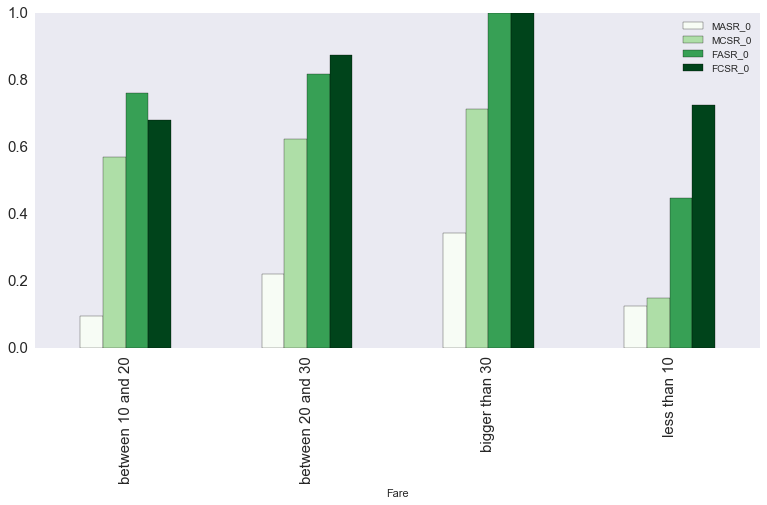

In [17]:
# Let's see the bar plot here
fare_survival_rate[['MASR_0','MCSR_0','FASR_0','FCSR_0']].plot(kind='bar',figsize=(13,6),grid=False,
                                                               colormap='Greens',fontsize=15)

### From this chart, we can see that people who paid the fare bigger than 30 had higher survival rate for all of the four groups, and people who paid less than 10 had the lowest rate to survived.
### What about other factors, for example, in the category of  fare 'bigger than 30', what's the difference between who lived in class 1 and class 2, did they have the same chance to survive? 
### Another question is worth of investigating, that is, female who paid larger than 30 fare all survived, does it mean that any female who would pay larger than 30 fare would survive? And, the reason why those female who paid less than 30 didn't survive is because they didn't pay this much or there are other factors making them hard to survive?
### Let's make another table to see the effects of other factors.

In [18]:
# grouped by Fare, Pclass and Family
fare_pclass_family = titan_non_outlier.groupby(['Fare','Pclass','Family'])

# calculate the survival rate of each group, named 'MASR', 'MCSR', 'FASR', 'FCSR' respectively
survival_rate = fare_pclass_family.sum()[['MA','MC','FA','FC','MAS','MCS','FAS','FCS']]
survival_rate['MASR'] = DataFrame(survival_rate['MAS'] / survival_rate['MA'])
survival_rate['MCSR'] = DataFrame(survival_rate['MCS'] / survival_rate['MC'])
survival_rate['FASR'] = DataFrame(survival_rate['FAS'] / survival_rate['FA'])
survival_rate['FCSR'] = DataFrame(survival_rate['FCS'] / survival_rate['FC'])

In [19]:
survival_rate

MA    MC    FA    FC   MAS  MCS   FAS  \
Fare              Pclass Family                                             
between 10 and 20 2      0        51.0   4.0  26.0   2.0   5.0  0.0  23.0   
                         1         1.0   0.0   2.0   1.0   0.0  0.0   2.0   
                         2         0.0   3.0   1.0   1.0   0.0  3.0   1.0   
                         3         1.0   0.0   0.0   0.0   0.0  0.0   0.0   
                  3      0         5.0   1.0   2.0   2.0   1.0  0.0   1.0   
                         1         9.0   2.0   7.0   8.0   0.0  2.0   3.0   
                         2         5.0   4.0   6.0   5.0   1.0  3.0   3.0   
                         3         0.0   0.0   2.0   3.0   0.0  0.0   2.0   
between 20 and 30 1      0        22.0   0.0   5.0   0.0  10.0  0.0   4.0   
                         1         1.0   0.0   0.0   0.0   0.0  0.0   0.0   
                         2         0.0   0.0   1.0   0.0   0.0  0.0   1.0   
                  2      0         5.0   1.0   2.0   0.0   0.0  0.0   2.0   
                         1        12.0   0.0  13.0   1.0   1.0  0.0  11.0   
                         2         3.0   3.0   5.0   4.0   0.0  3.0   4.0   
                         3         1.0   0.0   3.0   1.0   0.0  0.0   3.0   
                  3      0         2.0   0.0   0.0   0.0   0.0  0.0   0.0   
                         2         3.0   3.0   4.0   2.0   0.0  1.0   2.0   
                         3         1.0   1.0   0.0   0.0   0.0  1.0   0.0   
bigger than 30    1      0        26.0   0.0  16.0   1.0   9.0  0.0  16.0   
                         1        26.0   1.0  23.0   4.0  11.0  0.0  23.0   
                         2         7.0   2.0   8.0   1.0   2.0  2.0   8.0   
                  2      0         1.0   1.0   0.0   0.0   0.0  0.0   0.0   
                         1         2.0   0.0   0.0   2.0   0.0  0.0   0.0   
                         2         6.0   2.0   3.0   0.0   0.0  2.0   3.0   
                         3         1.0   1.0   3.0   2.0   0.0  1.0   3.0   
                  3      0         4.0   0.0   0.0   0.0   3.0  0.0   0.0   
less than 10      1      0         4.0   0.0   0.0   0.0   0.0  0.0   0.0   
                  3      0       161.0  14.0  24.0  10.0  20.0  2.0  12.0   
                         1         7.0   3.0   5.0   1.0   2.0  1.0   1.0   
                         2         3.0   3.0   0.0   0.0   0.0  0.0   0.0   

                                 FCS      MASR      MCSR      FASR  FCSR  
Fare              Pclass Family                                           
between 10 and 20 2      0       2.0  0.098039  0.000000  0.884615   1.0  
                         1       1.0  0.000000       NaN  1.000000   1.0  
                         2       1.0       NaN  1.000000  1.000000   1.0  
                         3       0.0  0.000000       NaN       NaN   NaN  
                  3      0       1.0  0.200000  0.000000  0.500000   0.5  
                         1       4.0  0.000000  1.000000  0.428571   0.5  
                         2       3.0  0.200000  0.750000  0.500000   0.6  
                         3       3.0       NaN       NaN  1.000000   1.0  
between 20 and 30 1      0       0.0  0.454545       NaN  0.800000   NaN  
                         1       0.0  0.000000       NaN       NaN   NaN  
                         2       0.0       NaN       NaN  1.000000   NaN  
                  2      0       0.0  0.000000  0.000000  1.000000   NaN  
                         1       1.0  0.083333       NaN  0.846154   1.0  
                         2       4.0  0.000000  1.000000  0.800000   1.0  
                         3       1.0  0.000000       NaN  1.000000   1.0  
                  3      0       0.0  0.000000       NaN       NaN   NaN  
                         2       1.0  0.000000  0.333333  0.500000   0.5  
                         3       0.0  0.000000  1.000000       NaN   NaN  
bigger than 30    1      0       1.0  0.346154       NaN  1.000000   1.

### There are lots of NaN values in the table, I will keep them where they are, because where there is a NaN, it's corresponding population is 0, which would distort the real survival result of each individual group if it's removed or filled by any number

### Let's plot according to the survival rate of each group in each category to see the effects of other factors.

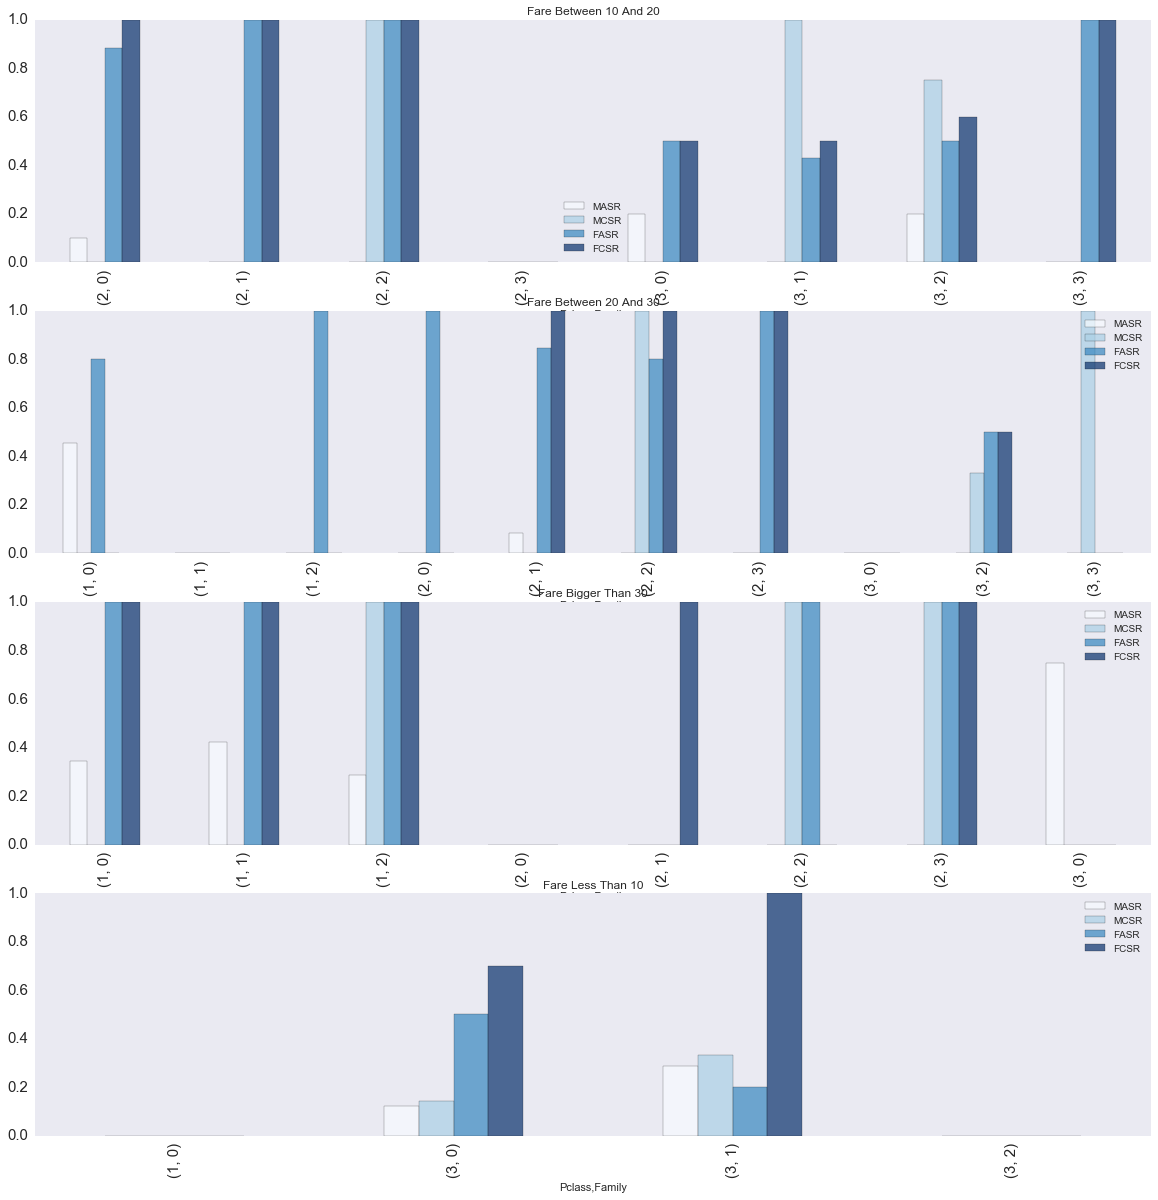

In [20]:
fig_b,axs_b = plt.subplots(4,1)
survival_rate[['MASR','MCSR','FASR','FCSR']].xs('between 10 and 20').plot(kind='bar',ax=axs_b[0],figsize=(20,20),alpha=0.7,
                                                                          colormap = 'Blues',grid=False,
                                                                          title='Fare Between 10 And 20',fontsize=15)                                                                          
survival_rate[['MASR','MCSR','FASR','FCSR']].xs('between 20 and 30').plot(kind='bar',ax=axs_b[1],figsize=(20,20),alpha=0.7,
                                                                          colormap = 'Blues',grid=False,
                                                                          title='Fare Between 20 And 30',fontsize=15)
survival_rate[['MASR','MCSR','FASR','FCSR']].xs('bigger than 30').plot(kind='bar',ax=axs_b[2],figsize=(20,20),alpha=0.7,
                                                                       colormap = 'Blues',grid=False,
                                                                       title='Fare Bigger Than 30',  fontsize=15)
survival_rate[['MASR','MCSR','FASR','FCSR']].xs('less than 10').plot(kind='bar',ax=axs_b[3],figsize=(20,20),alpha=0.7,
                                                                     colormap = 'Blues',grid=False,
                                                                     title='Fare Less Than 10', fontsize=15)

### Let me answer my first question first:  in the category of fare 'bigger than 30', what's the difference between who lived in class 1 and class 2, did they have the same chance to survive?
### In the category of 'Fare Bigger Than 30' in the chart above, there are several combinations of pclass and family size, for those who lived in class 1, all groups except the male child show high survival rate, maybe not so high for male adults, but high enough compared with those in other fare categories, however, for those who lived in class 2, it's not so promising especially for male, so actually, there is some marginal difference between class 1 and class 2.
### What is strange here is ,there is a high rate for male who paid more than 30 but lived in class 3. Does it tell us another story: a man could get more chance to survive if he could pay more, if it did mean that, can we say that any man trying to get out of titanic could get out of there by paying more?

### The second question I mentioned previously before this section:  female who paid larger than 30 fare all survived, does it mean that any female who would pay larger than 30 fare would survive? And, the reason why those female who paid less than 30 didn't survive is because they didn't pay this much or there are other factors making them hard to survive?
### In fact, here are two questions, I will leave the former question later. 
### To answer the later question, let's compare the rate for female in different categories with same combination, for example, with the class and family size combination of (1,2), the rates are both hundred percent for those who paid more than 30 and who paid between 20 and 30; with the combination of (2,2), the rates are both hundred percent for those who paid more than 30 and who paid between 10 and 20, which are a little higher than those who paid between 20 and 30. But look at the female who lived in class 3, they got much lower chance to survive compared to those living the class 1 and 2. 
### All this means that, the chance for female to be able to survive does have, something, but not everything to do with their payment, factors like class and family size matter. 

In [21]:
print 'male who paid less than 30 has the average survival rate of %.2f' % \
survival_rate.drop('bigger than 30')['MASR'].mean()
print 'the standard deviation is %.2f' % survival_rate.drop('bigger than 30')['MASR'].std()

print 'male who paid more than 30 has the average survival rate of %.2f' % \
survival_rate.ix['bigger than 30']['MASR'].mean()
print 'the standard devivation is %.2f' % survival_rate.ix['bigger than 30']['MASR'].std()

male who paid less than 30 has the average survival rate of 0.08
the standard deviation is 0.13
male who paid more than 30 has the average survival rate of 0.23
the standard devivation is 0.28


### Here, we can see the average survival for male who paid less than 30 is 0.08, which is much lower than those who paid more than 30, so we could say as a man pays more ,he has higher chance to survive, which is also shown in the first bar chart above.
### Let's take a look at the standard deviation too, which is lower in those who paid less than 30 as well. This could mean, there is more variance or say uncertainty for those who paid more than 30.

### Female side:

In [22]:
print 'female who paid less than 30 has the average survival rate of %.2f' % \
survival_rate.drop('bigger than 30')['FASR'].mean()
print 'the standard deviation is %.2f' % survival_rate.drop('bigger than 30')['FASR'].std()

print 'female who paid more than 30 has the average survival rate of %.2f' % \
survival_rate.ix['bigger than 30']['FASR'].mean()
print 'the standard devivation is %.2f' % survival_rate.ix['bigger than 30']['FASR'].std()

female who paid less than 30 has the average survival rate of 0.75
the standard deviation is 0.27
female who paid more than 30 has the average survival rate of 1.00
the standard devivation is 0.00


### We also see from the calculation that female who paid more than 30 had higher chance to survive than those who paid less than 30, even though the difference was not so much as of male.
### Here is the question I haven't answered:  female who paid larger than 30 fare all survived, does it mean that any female who would pay larger than 30 fare would survive? 
### The mean survival rate of female who paid more than 30 is 1, and the std is 0, for this sample dataset, all female who paid more than 30 indeed survived, but we cannot infer that any female who would pay larger than 30 would survive.

### Finally, Let's make a comparison between the fare paid by those who survived and those who didn't. Below are two plots showing the that difference of two respective group -- Male and Female. 

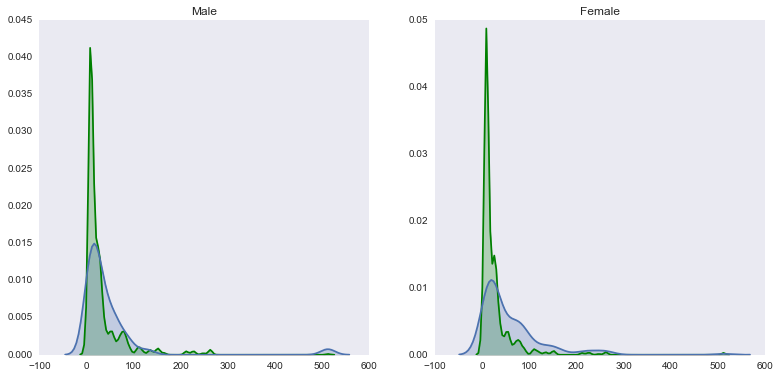

In [23]:
MAS_fare_0 = titanic_data[titanic_data['MAS'].values==0]['Fare']
MAS_fare_1 = titanic_data[titanic_data['MAS'].values==1]['Fare']
FAS_fare_0 = titanic_data[titanic_data['FAS'].values==0]['Fare']
FAS_fare_1 = titanic_data[titanic_data['FAS'].values==1]['Fare']
fig,ax = plt.subplots(1,2,figsize=(13,6))
ax1 = sns.kdeplot(MAS_fare_0,ax=ax[0],color='g',shade=True,legend=False)
ax2 = sns.kdeplot(MAS_fare_1,ax=ax[0],shade=True,legend=False)
ax3 = sns.kdeplot(FAS_fare_0,ax=ax[1],color='g',shade=True,legend=False)
ax4 = sns.kdeplot(FAS_fare_1,ax=ax[1],shade=True,legend=False)
ax[0].grid(False)
ax[0].set_title('Male')
ax[1].grid(False)
ax[1].set_title('Female')

### We can see there is no much distinction in these two groups. The green distribution represents the fare paid by those who didn't survive, in both groups, people paying higher fare tended to higher survivability. For female, there was bigger chance to survive when they paid more than for male .

### In summary, female passengers on titanic had much higher chance to survive than male passengers, taking some other factors into account, we may conclude that, fare was a large part for people's suvivability, class level had some effect on survivability, whereas family didn't have much.

### Finally, there are some limitations in this dataset analysis.
### First of all, I analyze this dataset based on the percentage of survival rate, and this percentage is zero when there is no one survived in a particular category, but there is also another situation that could cause zero, which is, on one in this particular category, and both of these two situations will appear to be no values in bar chart, so that we couldn't tell which situation it reall is. So from this point, bar chart can't provide a clear picture unless combined with the table itself.
### Secondly, I set the fare column into three seperate categories, which are 'bigger than 30', 'between 20 and 30', 'between 10 and 20' and 'less than 10'. This division could be biased, because the fare has its corresponding class level, very few people could get across this boundary, so the comparison among class and family size combinations in different categories can't be very accurate.
### Lastly, I divided child and adult by the age of 18, but actually, there were many young men below 18 went on to titanic alone, and pratically speaking, they couldn't be counted as children, I think that's why there are many zeros in MCSR column with the family size of zero, which is very characteristic for this group.